# Data Preparation

In [2]:
import scipy.io

# Load the .mat file
mat_data = scipy.io.loadmat('/content/Image.mat')

In [3]:
# Check the keys to understand the structure
print(mat_data.keys())

dict_keys(['__header__', '__version__', '__globals__', 'data', 'target'])


In [4]:
# Inspect the 'data' and 'target'
print(type(mat_data['data']))
print(type(mat_data['target']))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [5]:
# print out their shapes or a sample of the data
print(mat_data['data'].shape)
print(mat_data['target'].shape)
print(mat_data['data'][:5])
print(mat_data['target'][:5])

(2000, 294)
(5, 2000)
[[3.75006198e-01 2.03906644e-04 3.75984715e-01 ... 1.63155426e-02
  1.64534655e-01 2.16379321e-02]
 [3.85814268e-01 4.65656910e-04 3.98042836e-01 ... 4.27173245e-02
  1.93575705e-01 4.18896260e-02]
 [3.57445999e-01 1.00037872e-03 3.60203909e-01 ... 2.19529290e-04
  5.35382009e-03 1.56702979e-04]
 [4.37556572e-01 1.89781544e-03 4.30115146e-01 ... 1.23182244e-01
  2.20428752e-01 2.86914442e-01]
 [4.58393630e-01 1.71757088e-04 4.58144872e-01 ... 1.01420500e-06
  1.70459440e-03 8.10103189e-07]]
[[ 1  1  1 ... -1  1  1]
 [-1 -1 -1 ...  1 -1 -1]
 [-1 -1 -1 ... -1 -1 -1]
 [-1 -1 -1 ... -1 -1 -1]
 [-1 -1 -1 ... -1 -1 -1]]


In [6]:
import numpy as np

# Assuming 'data' is your feature matrix and 'target' is your label vector
X = np.array(mat_data['data'])
y = np.array(mat_data['target'])

# Normalize the data
X = X / 255.0

# Checking and Handling Missing Values

In [7]:
data_shape = X.shape
print(data_shape)

(2000, 294)


In [8]:
# Calculate the dimensions
num_blocks = 49
num_channels = 3
num_statistics = 2

# Calculate the image dimension
original_features = num_blocks * num_channels * num_statistics
print(original_features)

294


In [9]:
# Reshape the data to match the block structure
num_images = X.shape[0]
X_images = X.reshape((num_images, 7, 7, 3, 2))

In [10]:
# Total elements per image
num_features_per_image = X.shape[1]
print(f"Features per image: {num_features_per_image}")

Features per image: 294


In [11]:
# Calculate total number of elements for given dimensions
expected_features = 7 * 7 * 3 * 2
print(f"Expected features per image: {expected_features}")

Expected features per image: 294


In [12]:
# Check for missing values
print(np.isnan(X).sum())
print(np.isnan(y).sum())

0
0


In [13]:
# Handle missing values if any (e.g., imputation)
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Feature Scaling

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

# Reshape and Verify Data

In [15]:
num_images = X.shape[0]
image_size = (7, 7, 3, 2)
X_images = X.reshape((num_images, *image_size))

In [16]:
print(y.shape)
print(y)

(5, 2000)
[[ 1  1  1 ... -1  1  1]
 [-1 -1 -1 ...  1 -1 -1]
 [-1 -1 -1 ... -1 -1 -1]
 [-1 -1 -1 ... -1 -1 -1]
 [-1 -1 -1 ... -1 -1 -1]]


In [17]:
# Convert one-hot encoded labels to class indices
y = np.argmax(y, axis=0)

In [18]:
print(y[:5])

[0 0 0 0 0]


In [19]:
print(np.sum(mat_data['target'], axis=0))

[-3 -3 -3 ... -3 -3 -3]


In [49]:
import scipy.io
import numpy as np

# Load data
mat_data = scipy.io.loadmat('/content/Image.mat')
target = mat_data['target']

# Inspect the original target values
print("Original target shape:", target.shape)
print("First few values of target:", target[:, :5])

Original target shape: (5, 2000)
First few values of target: [[ 1  1  1  1  1]
 [-1 -1 -1  1 -1]
 [-1 -1 -1 -1 -1]
 [-1 -1 -1 -1 -1]
 [-1 -1 -1 -1 -1]]


In [51]:

y = np.argmax(target, axis=0) if target.ndim > 1 else target.flatten()
# Verify conversion
print("Converted y shape:", y.shape)
print("First few labels after conversion:", y[:5])

Converted y shape: (2000,)
First few labels after conversion: [0 0 0 0 0]


In [52]:
print("Original target values (first few columns):", target[:, :5])

Original target values (first few columns): [[ 1  1  1  1  1]
 [-1 -1 -1  1 -1]
 [-1 -1 -1 -1 -1]
 [-1 -1 -1 -1 -1]
 [-1 -1 -1 -1 -1]]


In [53]:
unique_values = np.unique(target)
print("Unique values in target:", unique_values)

Unique values in target: [-1  1]


In [54]:
if target.ndim > 1:
    y = np.argmax(target, axis=0)
else:
    y = target.flatten()  # Or adjust based on actual encoding

# Verify conversion
print("Converted y values (first few):", y[:5])

Converted y values (first few): [0 0 0 0 0]


In [55]:
unique, counts = np.unique(y, return_counts=True)
print("Class label distribution:", dict(zip(unique, counts)))

Class label distribution: {0: 409, 1: 438, 2: 531, 3: 244, 4: 378}


In [57]:
from sklearn.model_selection import train_test_split

X = mat_data['data']
y = np.argmax(mat_data['target'], axis=0)  # Ensure y is in correct format

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training

In [58]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Model Definition and Compilation

In [59]:
# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(5, activation='softmax')  # Assuming 5 classes
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [60]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [61]:
print(X.shape)

(2000, 294)


In [62]:
total_features = X.size / X.shape[0]
print(f"Total features per image: {total_features}")

Total features per image: 294.0


In [63]:
expected_features = 64 * 64 * 3
print(f"Expected features per image: {expected_features}")

Expected features per image: 12288


In [64]:
print("Data shape:", X.shape)

Data shape: (2000, 294)


# Checking with Random Forest

In [65]:
param_grid = {
    'n_estimators': [100],
    'max_depth': [10],
    'min_samples_split': [2]
}

In [66]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint

param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': randint(5, 20),
    'min_samples_split': randint(2, 10)
}
clf = RandomForestClassifier(random_state=42)
random_search = RandomizedSearchCV(clf, param_distributions=param_dist, n_iter=10, cv=5, n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)

print("Best Parameters:", random_search.best_params_)
best_model = random_search.best_estimator_

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Best Parameters: {'max_depth': 19, 'min_samples_split': 4, 'n_estimators': 121}


In [67]:
from sklearn.model_selection import GridSearchCV
X_train_small, _, y_train_small, _ = train_test_split(X_train, y_train, test_size=0.9, random_state=42)
# Initialize GridSearchCV
grid_search = GridSearchCV(clf, param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10], 'min_samples_split': [2],
                         'n_estimators': [100]},
             verbose=2)

In [68]:

print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

# Evaluate the best model
y_pred = best_model.predict(X_test)
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred))

Best Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy: 0.69


# Retraining with CNN

In [69]:
from tensorflow.keras.utils import to_categorical

# Convert labels to one-hot encoding
y_train_cat = to_categorical(y_train, num_classes=5)
y_test_cat = to_categorical(y_test, num_classes=5)

In [70]:
print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

Shape of X: (2000, 294)
Shape of y: (2000,)


In [71]:
# Example to print shape and sample data from the mat file
print("Keys in mat_data:", mat_data.keys())
print("Shape of data:", mat_data['data'].shape)  # Shape of features
print("Shape of target:", mat_data['target'].shape)  # Shape of labels

Keys in mat_data: dict_keys(['__header__', '__version__', '__globals__', 'data', 'target'])
Shape of data: (2000, 294)
Shape of target: (5, 2000)


In [73]:
# Ensure y is a 1D array of labels
if y.ndim > 1:
    y = np.argmax(y, axis=1)

In [74]:
print(f"Number of samples in X: {X.shape[0]}")
print(f"Number of samples in y: {y.shape[0]}")

Number of samples in X: 2000
Number of samples in y: 2000


In [75]:
y = y[:2000]

In [76]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Convert labels to categorical for classification
y_cat = to_categorical(y)

# Build a Dense Neural Network model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X.shape[1],)),
    Dense(64, activation='relu'),
    Dense(5, activation='softmax')  # Assuming 5 classes
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train_cat, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.2602 - loss: 1.5574 - val_accuracy: 0.3438 - val_loss: 1.4035
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4076 - loss: 1.3560 - val_accuracy: 0.4625 - val_loss: 1.2606
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5144 - loss: 1.2264 - val_accuracy: 0.4656 - val_loss: 1.1781
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5396 - loss: 1.1315 - val_accuracy: 0.6031 - val_loss: 1.1159
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5724 - loss: 1.0621 - val_accuracy: 0.6125 - val_loss: 1.0549
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5889 - loss: 1.0550 - val_accuracy: 0.6156 - val_loss: 1.0655
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5793 - loss: 1.0302 - val_accuracy: 0.6125 - val_loss: 0.9987
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6298 - loss: 0.9453 - val_accuracy: 0.6125 - val_loss: 1.0334
Ep

In [78]:
loss, accuracy = model.evaluate(X_test, y_test_cat)
print(f"Test accuracy: {accuracy:.4f}")

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5527 - loss: 1.0851 
Test accuracy: 0.5800


In [79]:
# If y_pred is a 1D array, no need to apply np.argmax
if len(y_pred.shape) == 1:
    y_pred_classes = y_pred
else:
    # If y_pred contains probabilities, convert them to class labels
    y_pred_classes = np.argmax(y_pred, axis=1)

# Check the shape and type of y_test and y_pred_classes
print(f"y_test shape: {y_test.shape}")
print(f"y_pred_classes shape: {y_pred_classes.shape}")

# Compare with true labels
from sklearn.metrics import accuracy_score, classification_report

# Ensure y_test is a 1D array of class labels (not one-hot encoded)
accuracy = accuracy_score(y_test, y_pred_classes)
report = classification_report(y_test, y_pred_classes)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(report)

y_test shape: (400,)
y_pred_classes shape: (400,)
Accuracy: 0.69
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.70      0.73        86
           1       0.64      0.78      0.70        88
           2       0.66      0.65      0.66        94
           3       0.55      0.53      0.54        49
           4       0.81      0.72      0.76        83

    accuracy                           0.69       400
   macro avg       0.69      0.68      0.68       400
weighted avg       0.70      0.69      0.69       400



# Hyperparameter Tuning with Keras Tuner

In [41]:
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 8.2 MB/s eta 0:00:00


In [85]:
import tensorflow as tf
from tensorflow.keras import layers
import keras_tuner as kt

def build_model(hp):
    model = tf.keras.Sequential()
    model.add(layers.Dense(
        units=hp.Int('units', min_value=32, max_value=512, step=32),
        activation='relu',
        input_shape=(X.shape[1],)
    ))
    model.add(layers.Dense(5, activation='softmax'))
    model.compile(
        optimizer=tf.keras.optimizers.Adam(
            hp.Choice('learning_rate', values=[1e-2, 1e-3])
        ),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

In [86]:
tuner = kt.Hyperband(
    build_model,
    objective='val_accuracy',
    max_epochs=10,
    hyperband_iterations=2,
    directory='my_dir',
    project_name='intro_to_kt'
)

tuner.search(
    X_train, y_train_cat,
    epochs=10,
    validation_data=(X_test, y_test_cat)
)

best_model = tuner.get_best_models(num_models=1)[0]

Reloading Tuner from my_dir/intro_to_kt/tuner0.json


In [84]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"Best units: {best_hps.get('units')}")
print(f"Best learning rate: {best_hps.get('learning_rate')}")

Best units: 384
Best learning rate: 0.001


# Update the model with best hyperparameters

In [87]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Build a Dense Neural Network model with best hyperparameters
model = Sequential([
    Dense(384, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(634, activation='relu'),
    Dense(5, activation='softmax')  # Assuming 5 classes
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Training the model

In [88]:
history = model.fit(X_train, y_train_cat,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.3345 - loss: 1.5171 - val_accuracy: 0.5031 - val_loss: 1.2292
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4722 - loss: 1.2151 - val_accuracy: 0.5281 - val_loss: 1.1133
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5414 - loss: 1.1013 - val_accuracy: 0.5906 - val_loss: 1.0649
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6070 - loss: 1.0094 - val_accuracy: 0.6000 - val_loss: 1.0378
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6091 - loss: 0.9453 - val_accuracy: 0.6562 - val_loss: 0.9299
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6366 - loss: 0.8870 - val_accuracy: 0.5969 - val_loss: 1.0288
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6479 - loss: 0.8765 - val_accuracy: 0.6250 - val_loss: 0.9804
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6723 - loss: 0.8233 - val_accuracy: 0.6500 - val_loss

# Evaluate the Model

In [89]:
# Evaluate on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test_cat)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6125 - loss: 1.0261  
Test Loss: 1.0084
Test Accuracy: 0.6450


# Make Predictions

In [90]:
# Predict on test data
y_pred_prob = model.predict(X_test)
y_pred_classes = np.argmax(y_pred_prob, axis=1)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


# Calculate Metrics

In [91]:
from sklearn.metrics import accuracy_score, classification_report

# Calculate accuracy
accuracy = accuracy_score(np.argmax(y_test_cat, axis=1), y_pred_classes)
print(f"Accuracy: {accuracy:.2f}")

# Classification report
report = classification_report(np.argmax(y_test_cat, axis=1), y_pred_classes)
print("Classification Report:")
print(report)

Accuracy: 0.65
Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.67      0.64        86
           1       0.77      0.55      0.64        88
           2       0.52      0.69      0.59        94
           3       0.63      0.45      0.52        49
           4       0.78      0.78      0.78        83

    accuracy                           0.65       400
   macro avg       0.66      0.63      0.64       400
weighted avg       0.66      0.65      0.64       400



# Model Improvement

In [92]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Build a more complex Dense Neural Network model
model = Sequential([
    Dense(256, activation='relu', input_shape=(X.shape[1],)),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dense(5, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with improved architecture
history = model.fit(X_train, y_train_cat, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.2432 - loss: 1.6189 - val_accuracy: 0.3688 - val_loss: 1.5201
Epoch 2/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2635 - loss: 1.5545 - val_accuracy: 0.4500 - val_loss: 1.4334
Epoch 3/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.3177 - loss: 1.4813 - val_accuracy: 0.4469 - val_loss: 1.3531
Epoch 4/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4004 - loss: 1.3682 - val_accuracy: 0.4531 - val_loss: 1.2819
Epoch 5/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3736 - loss: 1.3492 - val_accuracy: 0.4688 - val_loss: 1.2082
Epoch 6/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.4314 - loss: 1.2798 - val_accuracy: 0.4688 - val_loss: 1.1699
Epoch 7/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4627 - loss: 1.2518 - val_accuracy: 0.5125 - val_loss: 1.1602
Epoch 8/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4917 - loss: 1.2046 - val_accuracy: 0.5437 - val_loss: 1.1203
E

# Evalute

In [93]:
# Evaluate the best model on the test data
test_loss, test_accuracy = best_model.evaluate(X_test, y_test_cat)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Make predictions
y_pred = best_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Classification report
from sklearn.metrics import classification_report
print("Classification Report:")
print(classification_report(np.argmax(y_test_cat, axis=1), y_pred_classes))

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5931 - loss: 1.0594  
Test Accuracy: 0.63
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.62      0.64        86
           1       0.59      0.77      0.67        88
           2       0.55      0.44      0.49        94
           3       0.62      0.51      0.56        49
           4       0.71      0.77      0.74        83

    accuracy                           0.63       400
   macro avg       0.63      0.62      0.62       400
weighted avg       0.63      0.63      0.62       400



13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


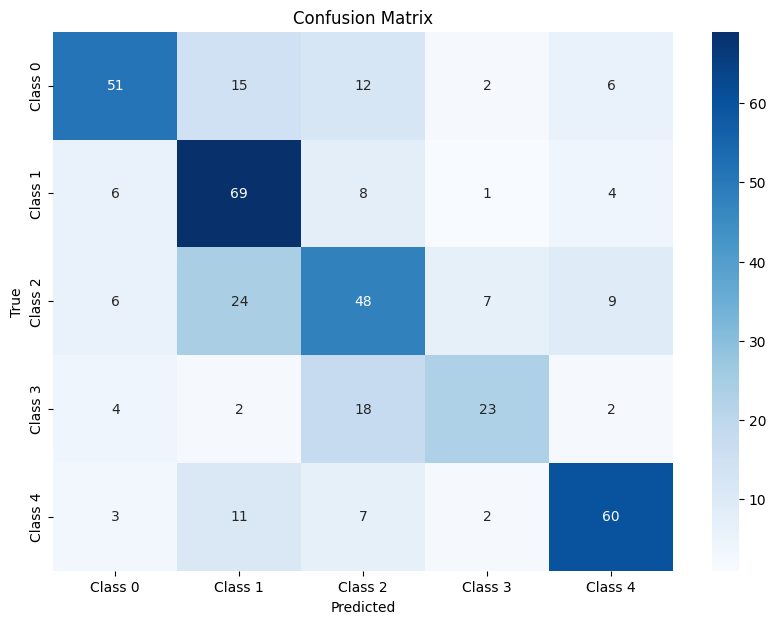

In [95]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming y_pred_classes and y_test_classes are already defined
y_pred_classes = np.argmax(model.predict(X_test), axis=1)
y_test_classes = np.argmax(y_test_cat, axis=1)

# Generate confusion matrix
cm = confusion_matrix(y_test_classes, y_pred_classes)

# Define class names
class_names = ['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4']

# Plot confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# K-Fold cross-validation

In [102]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import numpy as np

# Convert labels to categorical
y_cat = to_categorical(y, num_classes=5)  # Ensure y is categorical and has 5 classes

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y_cat, test_size=0.2, random_state=42)

# Define a function to create and compile the model
def create_model(units=128, learning_rate=0.001):
    model = Sequential([
        Input(shape=(X.shape[1],)),  # Define the input shape here
        Dense(units, activation='relu'),
        Dense(64, activation='relu'),
        Dense(5, activation='softmax')  # Output layer with 5 classes
    ])
    model.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Create and train the model
model = create_model()
history = model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0, validation_data=(X_val, y_val))

# Evaluate the model
val_loss, val_acc = model.evaluate(X_val, y_val)
print(f"Validation accuracy: {val_acc}")

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5215 - loss: 1.1807 
Validation accuracy: 0.574999988079071


In [103]:
from sklearn.model_selection import KFold
import numpy as np

# Convert labels to categorical
y_cat = to_categorical(y, num_classes=5)

# K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cross_val_scores = []

for train_index, val_index in kf.split(X):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y_cat[train_index], y_cat[val_index]

    model = create_model()
    model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0, validation_data=(X_val, y_val))

    val_loss, val_acc = model.evaluate(X_val, y_val)
    cross_val_scores.append(val_acc)

print(f"Cross-validation scores: {cross_val_scores}")
print(f"Mean cross-validation score: {np.mean(cross_val_scores)}")

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6234 - loss: 0.9758 
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6032 - loss: 1.0616 
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6059 - loss: 1.0872 
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6214 - loss: 0.9471 
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6983 - loss: 0.8417 
Cross-validation scores: [0.5950000286102295, 0.6200000047683716, 0.6075000166893005, 0.5799999833106995, 0.6075000166893005]
Mean cross-validation score: 0.6020000100135803


In [104]:
from sklearn.metrics import classification_report

# Predict on validation data
y_pred_probs = model.predict(X_val)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true_classes = np.argmax(y_val, axis=1)

# Classification report
report = classification_report(y_true_classes, y_pred_classes)
print("Classification Report:")
print(report)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.45      0.93      0.61        71
           1       0.60      0.71      0.65        87
           2       0.71      0.32      0.44       106
           3       0.68      0.52      0.59        48
           4       0.85      0.64      0.73        88

    accuracy                           0.61       400
   macro avg       0.66      0.62      0.60       400
weighted avg       0.67      0.61      0.60       400



In [105]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Convert probabilities to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [106]:
# Save the model
model.save('my_model.h5')

In [107]:
from tensorflow.keras.models import load_model

# Load the model
model = load_model('my_model.h5')

In [109]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

def create_model(units=128, learning_rate=0.001):
    model = Sequential([
        Dense(units, activation='relu', input_shape=(X_train.shape[1],)),
        Dropout(0.5),  # Add dropout for regularization
        Dense(64, activation='relu'),
        Dense(5, activation='softmax')
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model


model = create_model(units=256, learning_rate=0.0005)  # Adjust units and learning rate
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.2376 - loss: 1.6395 - val_accuracy: 0.1375 - val_loss: 1.7750
Epoch 2/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3478 - loss: 1.4481 - val_accuracy: 0.2281 - val_loss: 1.8364
Epoch 3/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3902 - loss: 1.3903 - val_accuracy: 0.2031 - val_loss: 1.8364
Epoch 4/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4213 - loss: 1.3229 - val_accuracy: 0.2656 - val_loss: 1.6077
Epoch 5/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4256 - loss: 1.2706 - val_accuracy: 0.2469 - val_loss: 1.7828
Epoch 6/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4549 - loss: 1.2484 - val_accuracy: 0.3219 - val_loss: 1.5686
Epoch 7/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4969 - loss: 1.1878 - val_accuracy: 0.2750 - val_loss: 1.6702
Epoch 8/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5119 - loss: 1.1742 - val_accuracy: 0.3938 - val_loss: 1.5240
Ep

In [113]:
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Load the saved model
model = load_model('/content/my_model.h5')

# Evaluate on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test_cat, verbose=0)
print(f"Test Accuracy: {test_accuracy:.2f}")
print(f"Test Loss: {test_loss:.2f}")

# Make predictions on test data
y_pred = model.predict(X_test)

# Convert predictions to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate accuracy and generate classification report
accuracy = accuracy_score(np.argmax(y_test_cat, axis=1), y_pred_classes)
report = classification_report(np.argmax(y_test_cat, axis=1), y_pred_classes)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(report)


Test Accuracy: 0.62
Test Loss: 0.94
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Accuracy: 0.62
Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.83      0.61        86
           1       0.63      0.70      0.67        88
           2       0.64      0.40      0.50        94
           3       0.72      0.53      0.61        49
           4       0.86      0.61      0.72        83

    accuracy                           0.62       400
   macro avg       0.67      0.62      0.62       400
weighted avg       0.66      0.62      0.62       400



/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Cross-validation accuracies: [0.5799999833106995, 0.6200000047683716, 0.5849999785423279, 0.5724999904632568, 0.6299999952316284]
Mean cross-validation accuracy: 0.5974999904632569
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


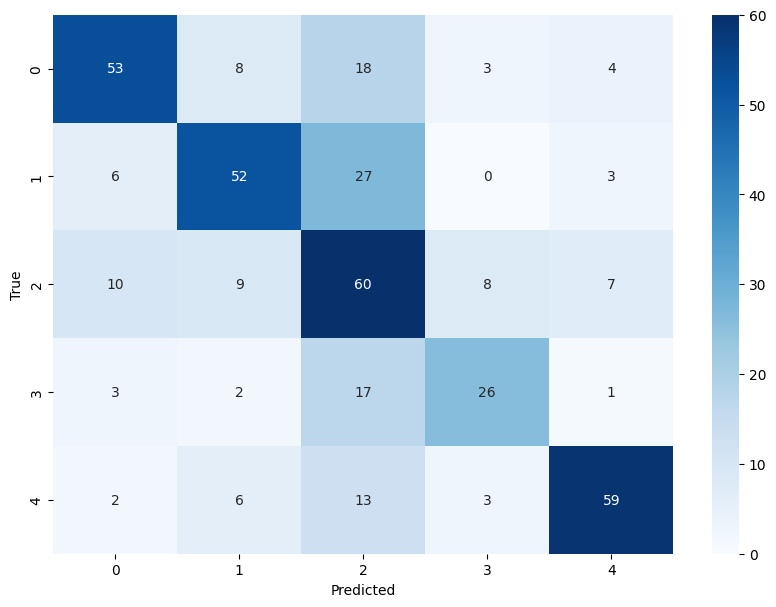

In [114]:
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

# Assuming `y` is not one-hot encoded, we need to one-hot encode `y_train` and `y_val` in each split
kf = KFold(n_splits=5, shuffle=True, random_state=42)
accuracies = []

for train_index, val_index in kf.split(X):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]

    # One-hot encode the training and validation labels
    y_train_cat = to_categorical(y_train, num_classes=5)
    y_val_cat = to_categorical(y_val, num_classes=5)

    model = create_model()  # Rebuild and train the model
    model.fit(X_train, y_train_cat, epochs=10, batch_size=32, verbose=0, validation_data=(X_val, y_val_cat))
    val_loss, val_accuracy = model.evaluate(X_val, y_val_cat, verbose=0)
    accuracies.append(val_accuracy)

print(f"Cross-validation accuracies: {accuracies}")
print(f"Mean cross-validation accuracy: {np.mean(accuracies)}")

# Confusion matrix for the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Assuming y_test is also one-hot encoded, convert it to class labels
y_true_classes = np.argmax(y_test_cat, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(5), yticklabels=np.arange(5))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [115]:
from tensorflow.keras.utils import to_categorical

# Assuming y_train and y_val are your original labels
y_train_cat = to_categorical(y_train, num_classes=5)  # Adjust num_classes as needed
y_val_cat = to_categorical(y_val, num_classes=5)


In [116]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def create_model(units=128, learning_rate=0.001):
    model = Sequential([
        Dense(units, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(64, activation='relu'),
        Dense(5, activation='softmax')  # Assuming 5 classes
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Rebuild and train the model
model = create_model()
history = model.fit(X_train, y_train_cat, epochs=10, batch_size=32, verbose=0, validation_data=(X_val, y_val_cat))
val_loss, val_accuracy = model.evaluate(X_val, y_val_cat, verbose=0)
accuracies.append(val_accuracy)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [117]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import numpy as np

# Convert your labels to one-hot encoding
y_train_cat = to_categorical(y_train, num_classes=5)  # Adjust num_classes if needed
y_val_cat = to_categorical(y_val, num_classes=5)

def create_model(units=128, learning_rate=0.001):
    model = Sequential([
        Dense(units, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(64, activation='relu'),
        Dense(5, activation='softmax')  # Assuming 5 classes
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Create and train the model
model = create_model()
history = model.fit(X_train, y_train_cat, epochs=10, batch_size=32, verbose=1, validation_data=(X_val, y_val_cat))

# Evaluate the model
val_loss, val_accuracy = model.evaluate(X_val, y_val_cat, verbose=0)
print(f'Validation Loss: {val_loss:.4f}')
print(f'Validation Accuracy: {val_accuracy:.4f}')


Epoch 1/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.3133 - loss: 1.5288 - val_accuracy: 0.4600 - val_loss: 1.3196
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4934 - loss: 1.2761 - val_accuracy: 0.5475 - val_loss: 1.1729
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5247 - loss: 1.1589 - val_accuracy: 0.6100 - val_loss: 1.0639
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6047 - loss: 1.0488 - val_accuracy: 0.5850 - val_loss: 1.0335
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5759 - loss: 1.0615 - val_accuracy: 0.6375 - val_loss: 1.0233
Epoch 6/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5949 - loss: 1.0247 - val_accuracy: 0.6400 - val_loss: 0.9698
Epoch 7/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6319 - loss: 0.9606 - val_accuracy: 0.5975 - val_loss: 1.0106
Epoch 8/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6565 - loss: 0.9063 - val_accuracy: 0.6425 - val_loss

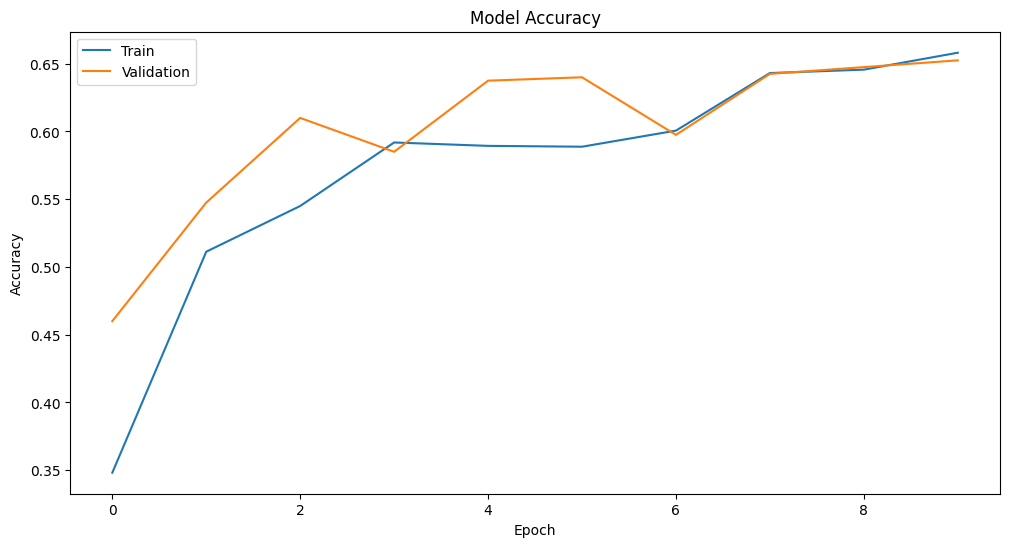

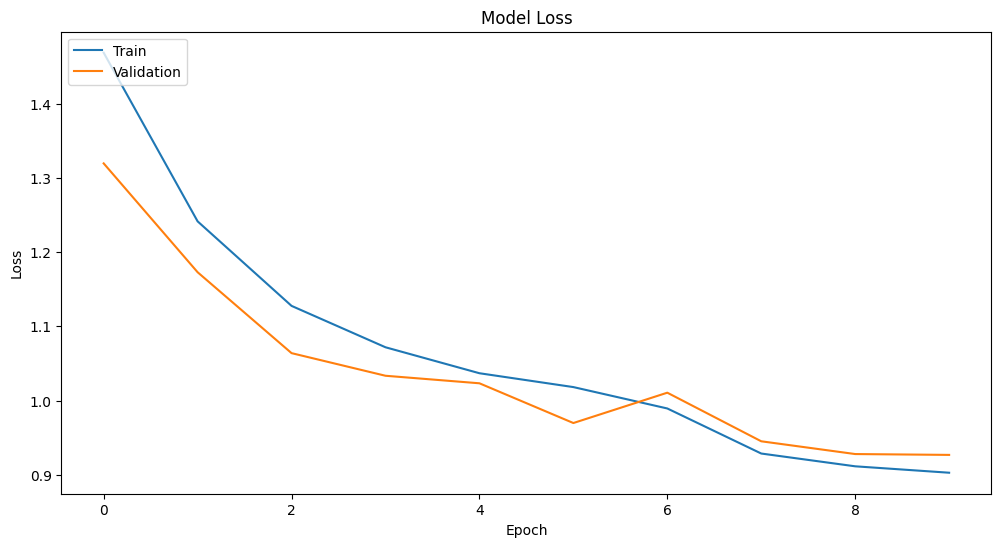

In [118]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [119]:
from sklearn.metrics import classification_report

# Predict on validation data
y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_val_classes = np.argmax(y_val_cat, axis=1)

# Print classification report
report = classification_report(y_val_classes, y_pred_classes)
print("Classification Report:")
print(report)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.55      0.62        71
           1       0.69      0.76      0.72        87
           2       0.51      0.61      0.56       106
           3       0.64      0.52      0.57        48
           4       0.79      0.75      0.77        88

    accuracy                           0.65       400
   macro avg       0.67      0.64      0.65       400
weighted avg       0.66      0.65      0.65       400



In [120]:
import pandas as pd
import numpy as np

# Assuming you have predictions and true labels
y_pred = model.predict(X_test)  # Model predictions
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels

# Create a DataFrame with the predictions and true labels
results_df = pd.DataFrame({
    'True_Label': y_test,
    'Predicted_Label': y_pred_classes
})


# Save to CSV
results_df.to_csv('model_predictions.csv', index=False)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


# Continuous learning through the feedback data

In [121]:
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf

# Function to create the model
def create_model(units=128, learning_rate=0.001):
    model = Sequential([
        Dense(units, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(64, activation='relu'),
        Dense(5, activation='softmax')  # Adjust number of classes
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [122]:
# Initialize and split data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
y_train_cat = to_categorical(y_train, num_classes=5)
y_val_cat = to_categorical(y_val, num_classes=5)

In [123]:
# Initial training and saving the model
model = create_model()
model.fit(X_train, y_train_cat, epochs=10, batch_size=32)
model.save("initial_model.h5")

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.2687 - loss: 1.5544
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4356 - loss: 1.3090
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5011 - loss: 1.1819
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5528 - loss: 1.1260
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5862 - loss: 1.0717
Epoch 6/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6066 - loss: 1.0100
Epoch 7/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6171 - loss: 0.9767
Epoch 8/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6258 - loss: 0.9405
Epoch 9/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6356 - loss: 0.9338
Epoch 10/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6535 - loss: 0.8842


In [124]:
# Function to simulate feedback data
def simulate_feedback():
    num_samples = 100
    num_features = X_train.shape[1]
    num_classes = y_train_cat.shape[1]
    new_samples = np.random.rand(num_samples, num_features)
    true_labels = np.random.randint(0, num_classes, num_samples)
    true_labels_cat = to_categorical(true_labels, num_classes=num_classes)
    return {
        "new_samples": new_samples,
        "true_labels": true_labels_cat
    }

In [125]:
# Function to save the model with versioning
def save_model_with_version(model, base_path="models/", version=1):
    if not os.path.exists(base_path):
        os.makedirs(base_path)
    model_path = os.path.join(base_path, f"model_v{version}.h5")
    model.save(model_path)
    print(f"Model saved as {model_path}")
    return version + 1

In [126]:
# Function for continuous learning
def continuous_learning_system(feedback_data, model_version):
    global X_train, y_train_cat, X_val, y_val_cat
    X_train = np.concatenate((X_train, feedback_data['new_samples']), axis=0)
    y_train_cat = np.concatenate((y_train_cat, feedback_data['true_labels']), axis=0)
    model = create_model()
    model.fit(X_train, y_train_cat, epochs=10, batch_size=32, verbose=0, validation_data=(X_val, y_val_cat))
    model_version = save_model_with_version(model, version=model_version)
    return model_version


In [127]:
# Lists to store performance metrics over versions
version_history = []
accuracy_history = []
loss_history = []

def log_performance(version, accuracy, loss):
    version_history.append(version)
    accuracy_history.append(accuracy)
    loss_history.append(loss)

In [128]:
# Simulate 5 updates and log performance
model_version = 1
for _ in range(5):
    val_loss, val_accuracy = model.evaluate(X_val, y_val_cat)
    print(f"Model Version: {model_version}")
    print(f"Validation Loss: {val_loss:.2f}, Validation Accuracy: {val_accuracy:.2f}")
    log_performance(model_version, val_accuracy, val_loss)
    feedback_data = simulate_feedback()
    model_version = continuous_learning_system(feedback_data, model_version)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5848 - loss: 1.0599  
Model Version: 1
Validation Loss: 1.05, Validation Accuracy: 0.62


Model saved as models/model_v1.h5
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5848 - loss: 1.0599 
Model Version: 2
Validation Loss: 1.05, Validation Accuracy: 0.62


Model saved as models/model_v2.h5
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5848 - loss: 1.0599 
Model Version: 3
Validation Loss: 1.05, Validation Accuracy: 0.62


Model saved as models/model_v3.h5
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5848 - loss: 1.0599 
Model Version: 4
Validation Loss: 1.05, Validation Accuracy: 0.62


Model saved as models/model_v4.h5
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5848 - loss: 1.0599 
Model Version: 5
Validation Loss: 1.05, Validation Accuracy: 0.62


Model saved as models/model_v5.h5


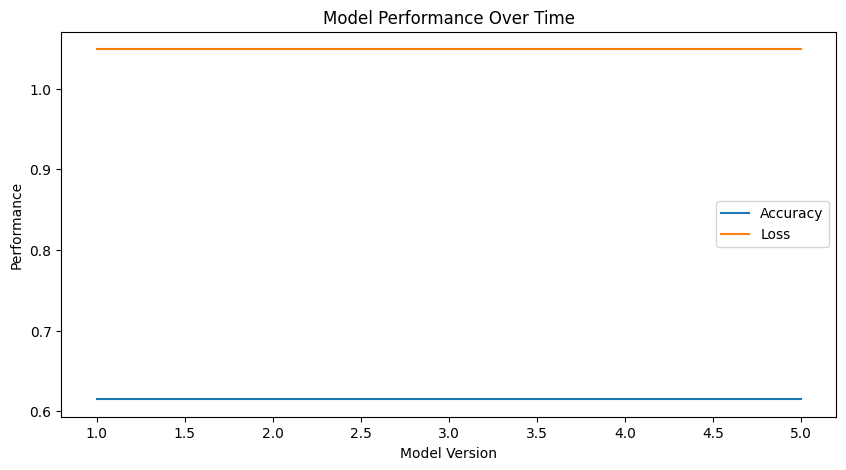

In [129]:
# Plot performance trends
plt.figure(figsize=(10, 5))
plt.plot(version_history, accuracy_history, label='Accuracy')
plt.plot(version_history, loss_history, label='Loss')
plt.xlabel('Model Version')
plt.ylabel('Performance')
plt.title('Model Performance Over Time')
plt.legend()
plt.show()

In [130]:
print("Version history:", version_history)
print("Accuracy history:", accuracy_history)
print("Loss history:", loss_history)

Version history: [1, 2, 3, 4, 5]
Accuracy history: [0.6150000095367432, 0.6150000095367432, 0.6150000095367432, 0.6150000095367432, 0.6150000095367432]
Loss history: [1.048840045928955, 1.048840045928955, 1.048840045928955, 1.048840045928955, 1.048840045928955]
